Félicitations à tous les étudiants qui passent l'examen certifiant de Data Analyst avec la Wild Scode School !  

Faire une copie de ce google collab, pour répondre au différentes questions.
Vous avez parcouru un chemin remarquable dans votre apprentissage des compétences analytiques et votre maîtrise des techniques de traitement des données.  
Vous serez évalué sur des compétences à travers 3 cas pratiques:
- SQL
- Immobilier
- Business Case Olist

Vous pouvez effectuer les cas pratiques dans l'ordre que vous souhaitez. Pour vous aider dans votre organisation de travail, vous trouverez une estimation du temps pour chaque partie.  
En ce qui concerne les réponses écrites, pensez à bien soigner les explications, comme si vous répondiez à un client.

**Votre google collab qui contient toutes vos réponses à l'examen devra être déposé au plus tard ______. Pensez bien à rendre accessible votre devoir en "Viewer".**   

---

**Pour le cas pratique "Olist", votre présentation se décompose sur deux supports:**
- **Slides de présentations contenant l'introduction (Présentation du contexte et problématique) et la conclusion (recommandations pour le client)**
- **Dashboard que vous utiliserez pour présenter vos graphiques et tables**

---
**Le nombre maximum de fichiers pouvant être déposé par candidat est de 30. Aussi, la capacité maximum pour l'ensemble des fichiers est de 50 Mo.
Veillez à ce que votre fichier de dashboard ne soit pas trop volumineux.**

---


Veuillez mettre parmi les pièces, vos slides sous format .pdf, ainsi que des captures d'écrans de votre tableau de bord à l'intérieur de ce même .pdf. Il est indispensable que tous les éléments pour la présentation soient déposés dans le temps imparti.


De mercredi à jeudi, auront lieu les oraux pour chaque candidat.
Chaque passage à l'oral se déroule de la façon suivante:

Pour chaque partie, le candidat présente son travail pendant 5 minutes, suivi de 10 minutes de questions par le juré examinateur.

Le cas pratique numéro 3 sera une présentation orale de 7 minutes, suivi de 8 minutes de questions.


Vous terminerez avec la présentation du cas pratique Olist, en répondant au besoin du client comme indiqué dans la partie Cas Pratique.


 Bonne chance à tous ! 🎉📊

---

# SQL _(2 heures)_

In [ ]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Obtenez le lien du fichier ZIP brut depuis GitHub
github_url = "https://github.com/WildCodeSchool/wilddata/raw/main/music.zip"

# Téléchargez le fichier ZIP
response = requests.get(github_url)

if response.status_code == 200:
    with open('music.zip', 'wb') as f:
        f.write(response.content)
    print("Fichier ZIP téléchargé avec succès.")

    # Dezipper
    with zipfile.ZipFile("music.zip", "r") as zip_ref:
        zip_ref.extractall()

    # Connection
    conn = sqlite3.connect('music.sqlite')
else:
    print("Échec du téléchargement du fichier ZIP depuis GitHub.")

Fichier ZIP téléchargé avec succès.


In [ ]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.

pd.read_sql("select * from album", conn)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


> 1. Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables. Quelle requête permettra d'afficher le nom d'artiste "Aerosmith", les morceaux disponibles d'un de leurs albums, ainsi que le prix de chacun des morceaux de cet album ?

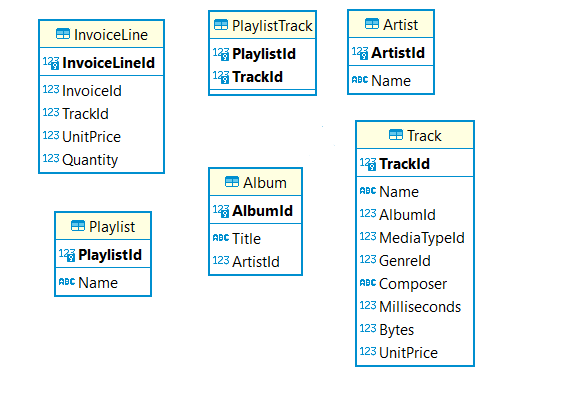

Résultat attendu:

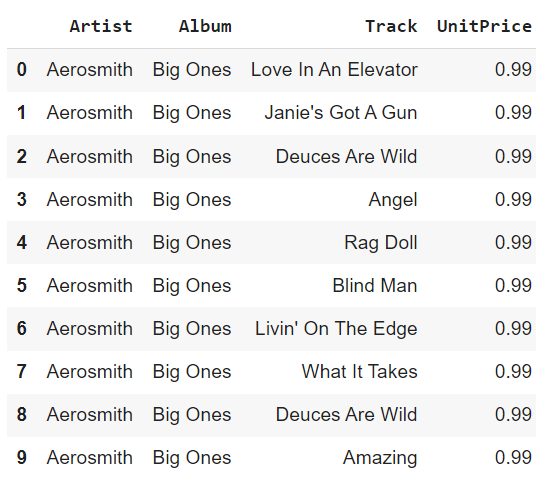

In [ ]:
pd.read_sql("""SELECT a.Name as Artist, Title as Album, t.Name as track, i.UnitPrice
FROM Artist as a
INNER JOIN Album as al ON a.ArtistID = al.ArtistID
INNER JOIN Track as t ON t.AlbumId = al.AlbumID
INNER JOIN InvoiceLine as i ON i.TrackID = t.TrackID
WHERE Artist like "Aerosmith"  """, conn)

,Artist,Album,track,UnitPrice
0,Aerosmith,Big Ones,Love In An Elevator,0.99
1,Aerosmith,Big Ones,Janie's Got A Gun,0.99
2,Aerosmith,Big Ones,Deuces Are Wild,0.99
3,Aerosmith,Big Ones,Angel,0.99
4,Aerosmith,Big Ones,Rag Doll,0.99
5,Aerosmith,Big Ones,Blind Man,0.99
6,Aerosmith,Big Ones,Livin' On The Edge,0.99
7,Aerosmith,Big Ones,What It Takes,0.99
8,Aerosmith,Big Ones,Deuces Are Wild,0.99
9,Aerosmith,Big Ones,Amazing,0.99


> 2. Toujours en se basant sur le schéma de la base de données, existe-t-il une table intermédiaire ? Si oui, quel est le nom de cette table ? Dans quelle situation est-il recommandé de créer une table intermédiaire pour connecter deux tables ?



_Réponse_: Oui, la table intermédiaire est la table PlaylistTrack.
il est recommandé de créer une table intermédiaire lorsqu'il y a une relation many to many entre les entités.

Effectuer des requêtes, pour répondre aux questions suivantes.

> 3.1 Renvoyer le nombre de morceaux par artiste et par album, dans la même requête. Un artiste peut être représenté plusieurs fois, si plusieurs de ces albums sont représentés dans la base de données

Résultat attendu:



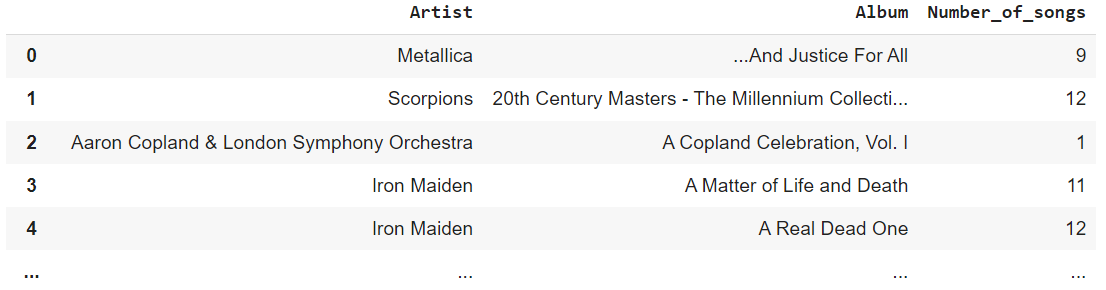

In [ ]:
pd.read_sql("""SELECT a.Name as Artist, Title as Album, count(t.TrackId) as Number_of_songs
FROM Artist as a
INNER JOIN Album as al ON a.ArtistID = al.ArtistID
INNER JOIN Track as t ON t.AlbumId = al.AlbumID
GROUP BY Album, Artist  """, conn)

,Artist,Album,Number_of_songs
0,Metallica,...And Justice For All,9
1,Scorpions,20th Century Masters - The Millennium Collecti...,12
2,Aaron Copland & London Symphony Orchestra,"A Copland Celebration, Vol. I",1
3,Iron Maiden,A Matter of Life and Death,11
4,Iron Maiden,A Real Dead One,12
...,...,...,...
342,Antônio Carlos Jobim,Warner 25 Anos,14
343,Kent Nagano and Orchestre de l'Opéra de Lyon,Weill: The Seven Deadly Sins,1
344,Aaron Goldberg,Worlds,1
345,U2,Zooropa,10


> 3.2 Quelles sont les 3 playlists qui contiennent le plus grand nombre d'artistes différents ? Les playlists qui portent le nom "Music" doivent être exclus.

Résultat attendu:  
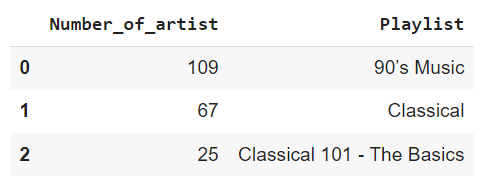

In [ ]:
pd.read_sql("""SELECT Count(DISTINCT a.ArtistId) As Number_of_artist, p.Name as Playlist
FROM Artist as a
INNER JOIN Album as al ON a.ArtistID = al.ArtistID
INNER JOIN Track as t ON t.AlbumId = al.AlbumID
INNER JOIN PlaylistTrack as pt ON pt.TrackID = t.TrackID
INNER JOIN Playlist as p ON p.PlaylistID = pt.PlaylistID
WHERE Playlist IS NOT "Music"
GROUP BY Playlist
ORDER BY Number_of_artist DESC
LIMIT 3  """, conn)

,Number_of_artist,Playlist
0,109,90’s Music
1,67,Classical
2,25,Classical 101 - The Basics


> 3.3. Quel artiste figure dans le plus grand nombre de playlists différentes ? On considère que les playlists qui portent le nom "Music" doivent être considérées comme une seule et même playlist.

Résultat attendu:  
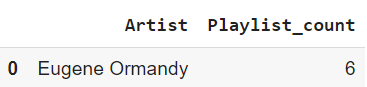

In [ ]:
pd.read_sql("""SELECT a.Name as Artist, count(PlaylistID) as Playlist_count
FROM Artist as a
INNER JOIN Album as al ON a.ArtistID = al.ArtistID
INNER JOIN Track as t ON t.AlbumId = al.AlbumID
INNER JOIN PlaylistTrack as pt ON pt.TrackID = t.TrackID
INNER JOIN Playlist as p ON p.PlaylistID = pt.PlaylistID
WHERE Playlist IS NOT "Music"
GROUP BY Playlist
ORDER BY Number_of_artist DESC
LIMIT 3  """, conn)

---

# Immobilier _(6 heures)_

## Pandas _(45 minutes)_

Voici un Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.
L'objectif de ce cas pratique est de répondre à plusieurs questions.

In [ ]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")

df_transactions

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2018-1404085,280000.0,25,11200,2,appartement,Paris 20e Arrondissement,Belleville 4,75120,75,751207704,75120000AL0064,2.389542,48.872300,2018-01-02
1,2018-1384130,110000.0,12,9166,1,appartement,Paris 14e Arrondissement,Montparnasse 4,75114,75,751145304,75114000AM0068,2.326280,48.835690,2018-01-02
2,2018-1376276,87950.0,9,9772,1,appartement,Paris 11e Arrondissement,Roquette 2,75111,75,751114302,75111000BS0234,2.386354,48.856080,2018-01-02
3,2018-1382007,699000.0,111,6297,6,appartement,Paris 13e Arrondissement,Maison Blanche 18,75113,75,751135118,75113000EI0007,2.343125,48.829746,2018-01-02
4,2018-1376139,251000.0,29,8655,2,appartement,Paris 12e Arrondissement,Picpus 5,75112,75,751124605,75112000BS0026,2.396901,48.834740,2018-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53180,2019-1082721,215000.0,18,11944,1,appartement,Paris 15e Arrondissement,Saint-Lambert 4,75115,75,751155704,75115000AO0027,2.297139,48.830433,2019-12-31
53181,2019-1102358,320905.0,27,11885,1,appartement,Paris 4e Arrondissement,Saint-Gervais 3,75104,75,751041403,75104000AJ0091,2.357617,48.856890,2019-12-31
53182,2019-1102357,201000.0,28,7178,1,appartement,Paris 2e Arrondissement,Bonne Nouvelle 2,75102,75,751020802,75102000AM0151,2.347458,48.865850,2019-12-31
53183,2019-1082682,283650.0,28,10130,1,appartement,Paris 15e Arrondissement,Saint-Lambert 9,75115,75,751155709,75115000BH0015,2.290955,48.835120,2019-12-31


4. Nettoyer le jeu de données pour qu'il puisse être utilisé pour conseiller les ménages de classe moyenne en recherche de logement.  
Le code et un justificatif sur les choix devront être présentés pour la présentation orale.

## 1. Selection des colonnes utiles


In [ ]:
df_transactions.columns

Index(['id_mutation', 'valeur_fonciere', 'surface_reelle_bati', 'prix_m2',
       'nombre_pieces_principales', 'type_local', 'nom_commune', 'nom_iris',
       'code_commune', 'code_departement', 'code_iris', 'id_parcelles',
       'longitude', 'latitude', 'date_mutation'],
      dtype='object')

In [ ]:
df_classe_moy = df_transactions[['valeur_fonciere', 'surface_reelle_bati', 'prix_m2',
       'nombre_pieces_principales', 'type_local', 'nom_commune',
       'code_commune']]

## 2.Filtres, Gestion des valeurs manquantes et abbérantes.

In [ ]:
df_classe_moy.isna().sum()

valeur_fonciere              0
surface_reelle_bati          0
prix_m2                      0
nombre_pieces_principales    0
type_local                   0
nom_commune                  0
code_commune                 0
dtype: int64

Il n'y a pas de valeurs manquantes. nous allons donc regarder les valeurs abérrantes pour les colonnes "valeur_fonciere", "surface_reelle_bati", "prix_m2", "type local" et "nombre_pieces_principales"

In [ ]:
import plotly.express as px

fig = px.box(df_classe_moy, y="valeur_fonciere")
fig.show()

Nous voyons que la valeur foncière est très éparpillée. Nous avons des prix de 10K à 195.6M d'euros. Je décide de filtrer sur ce qui est inférieur ou égal au q3 ( 600K) ainsi que ce qui est supérieur au q1(240K) car nous visons la classe moyenne.

In [ ]:
#Filtre sur valeur foncière inférieur ou égale à 600 000 et supérieur ou égale à 240 000
df_classe_moy = df_classe_moy.loc[(df_classe_moy["valeur_fonciere"] <= 600000) & (df_classe_moy["valeur_fonciere"] >= 240000)]

In [ ]:
df_classe_moy["type_local"].value_counts()

appartement         25263
local industriel     1707
maison                 19
Name: type_local, dtype: int64

Nous allons sélectionner que les appartements et les maisons.

In [ ]:
#filtre sur maison ou appartement.
df_classe_moy = df_classe_moy.loc[(df_classe_moy["type_local"]== "maison") | (df_classe_moy["type_local"] == "appartement")]

In [ ]:
fig = px.box(df_classe_moy, y="surface_reelle_bati")
fig.show()

Je décide de ne prendre que les surfaces supérieur au q1 qui est de 31 m2

In [ ]:
#Filtre sur surface supérieur à 31m2
df_classe_moy = df_classe_moy.loc[df_classe_moy["surface_reelle_bati"] >= 31]

In [ ]:
df_classe_moy["nombre_pieces_principales"].value_counts()

2    10619
3     5907
1     1931
4      544
5       69
0        8
6        6
7        1
Name: nombre_pieces_principales, dtype: int64

In [ ]:
#visualisation des lignes ou le nombre de pièces est de 0
df_classe_moy.loc[df_classe_moy["nombre_pieces_principales"] == 0 ]

,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,code_commune
243,327500.0,31,10564,0,appartement,Paris 5e Arrondissement,75105
1577,480000.0,40,12000,0,appartement,Paris 13e Arrondissement,75113
12179,452000.0,35,12914,0,appartement,Paris 15e Arrondissement,75107
13523,420000.0,45,9333,0,appartement,Paris 17e Arrondissement,75117
20701,428000.0,38,11263,0,appartement,Paris 15e Arrondissement,75115
24457,350000.0,32,10937,0,appartement,Paris 12e Arrondissement,75112
37213,430000.0,39,11025,0,appartement,Paris 15e Arrondissement,75115
45068,289829.0,35,8280,0,appartement,Paris 18e Arrondissement,75118


In [ ]:
#visualisation des lignes ou le nombre de pièces est de 7
df_classe_moy.loc[df_classe_moy["nombre_pieces_principales"] == 7 ]

,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement
49203,485000.0,155,3129,7,appartement,Paris 20e Arrondissement,Saint-Fargeau 7,75120,75


Je prends la décision de garder ces lignes car ils ne sont pas incohérent en terme de surface et de prix.

In [ ]:
fig = px.box(df_classe_moy, y="prix_m2")
fig.show()

Je décide également de garder ces différents prix au mètre carré afin de laisser un plus large choix aux clients. en effet , les clients peuvent vouloir un plus petit appartement mais dans les quartiers les plus uppés de Paris.

# Voici le dataset final pour conseillé les classe moyennes pour un logement à Paris.

In [ ]:
df_classe_moy

,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,code_commune
7,397500.0,48,8281,2,appartement,Paris 16e Arrondissement,75116
12,400000.0,40,10000,2,appartement,Paris 15e Arrondissement,75115
15,600000.0,62,9677,3,appartement,Paris 15e Arrondissement,75115
17,312450.0,33,9468,2,appartement,Paris 20e Arrondissement,75120
19,524000.0,55,9527,3,appartement,Paris 20e Arrondissement,75120
...,...,...,...,...,...,...,...
53172,525000.0,56,9375,2,appartement,Paris 15e Arrondissement,75115
53174,420000.0,71,5915,3,appartement,Paris 10e Arrondissement,75110
53176,510000.0,63,8095,4,appartement,Paris 15e Arrondissement,75115
53177,571300.0,55,10387,3,appartement,Paris 20e Arrondissement,75120


> 5. En se référant au dataset de base, réaliser un classement croissant du prix moyen du mètre carré par arrondissememt, en se basant sur les transactions du dataset.

In [ ]:
df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")

In [ ]:
# groupement des prix moyen par arrondissements
df_prix_arrond = df_transactions[["prix_m2","nom_commune"]].groupby(['nom_commune']).mean().round(2)
df_prix_arrond


,prix_m2
nom_commune,
Paris 10e Arrondissement,9612.90
Paris 11e Arrondissement,9574.43
Paris 12e Arrondissement,8911.45
Paris 13e Arrondissement,8947.23
Paris 14e Arrondissement,9610.58
Paris 15e Arrondissement,9520.73
Paris 16e Arrondissement,10534.02
Paris 17e Arrondissement,10032.41
Paris 18e Arrondissement,9028.12


In [ ]:
# Tri par ordre croissant
df_prix_arrond = df_prix_arrond.sort_values(by='prix_m2')
df_prix_arrond

,prix_m2
nom_commune,
Paris 19e Arrondissement,8263.09
Paris 20e Arrondissement,8435.12
Paris 12e Arrondissement,8911.45
Paris 13e Arrondissement,8947.23
Paris 18e Arrondissement,9028.12
Paris 15e Arrondissement,9520.73
Paris 11e Arrondissement,9574.43
Paris 14e Arrondissement,9610.58
Paris 10e Arrondissement,9612.90


> 6. Un couple vient vivre à Paris et aimerait acheter un logement.  Ils ne connaissent absolument pas la ville de Paris, mais ont quelques critères et préférences, que voici ci-dessous.
- Budget Max : 450 000 euros
- Idéalement, nature à proximité
- Environnement assez calme

Faire une recommandation au couple, en vous basant sur l'historique de transactions du dataset. Votre recommandation permettra au couple d'avoir une idée assez précise du lieu qui pourrait à la fois leur convenir et rentrer dans leur budget.

In [ ]:
#filtre sur le prix
df_recommandation = df_transactions.loc[df_transactions["valeur_fonciere"] <= 450000]

D'après les recherches sur internet , plusieurs arrondissement correspond à la recherche "environnement assez calme" et " nature à proximité" :  17ème arrondissement,  5ème arrondissement, 13ème arrondissement, 18ème arrondissement, 3ème arrondissement, 4ème arrondissement et le 19ème arrondissement

In [ ]:
#filtre sur les arrondissements
arrondissements = ["Paris 17e Arrondissement", "Paris 5e Arrondissement", "Paris 13e Arrondissement", "Paris 18e Arrondissement", "Paris 3e Arrondissement", "Paris 4e Arrondissement", "Paris 19e Arrondissement"]
df_recommandation = df_recommandation[df_recommandation["nom_commune"].isin(arrondissements)]

In [ ]:
#filtre sur les types de logements
df_recommandation = df_recommandation.loc[(df_recommandation["type_local"]== "maison") | (df_recommandation["type_local"] == "appartement")]

In [ ]:
#filtre sur le nombre de pièce est supérieur ou égal à 2
df_recommandation = df_recommandation.loc[(df_recommandation["nombre_pieces_principales"] >= 2)]


In [ ]:
df_recommandation

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
5,2018-1399368,140000.0,22,6363,1,appartement,Paris 18e Arrondissement,Grandes Carrieres 20,75118,75,751186920,75118000AY0066,2.340625,48.896687,2018-01-02
6,2018-1399427,387000.0,28,13821,2,appartement,Paris 18e Arrondissement,Clignancourt 12,75118,75,751187012,75118000BK0027,2.341871,48.890423,2018-01-02
29,2018-1368623,183000.0,13,14076,1,appartement,Paris 5e Arrondissement,Sorbonne 1,75105,75,751052001,75105000BL0049,2.348050,48.847340,2018-01-03
43,2018-1399449,215000.0,21,10238,2,appartement,Paris 18e Arrondissement,Clignancourt 26,75118,75,751187026,75118000BD0046,2.346151,48.896416,2018-01-03
44,2018-1395459,305000.0,35,8714,2,appartement,Paris 17e Arrondissement,Plaine Monceau 11,75117,75,751176611,75117000BS0042,2.306730,48.887177,2018-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53166,2019-1091010,122000.0,13,9384,1,appartement,Paris 17e Arrondissement,Plaine Monceau 7,75117,75,751176607,75117000BJ0044,2.298504,48.882965,2019-12-31
53167,2019-1090989,88968.0,24,3707,2,appartement,Paris 17e Arrondissement,Batignolles 11,75117,75,751176711,75117000CI0025,2.315385,48.886300,2019-12-31
53168,2019-1091022,150000.0,15,10000,1,appartement,Paris 17e Arrondissement,Plaine Monceau 4,75117,75,751176604,75117000BL0102,2.307332,48.880394,2019-12-31
53169,2019-1091029,130000.0,14,9285,1,appartement,Paris 17e Arrondissement,Plaine Monceau 9,75117,75,751176609,75117000BT0002,2.299099,48.885513,2019-12-31


---

## API, Regex & RGPD _(1 heure)_

Voici les données de géolocalisation d'un appartement vendu en 2018. L'objectif est de retrouver l'adresse de cet appartement à partir des coordonnées de géolocalisation ("latitude", "longitude"), grâce à une API.

In [ ]:
latitude_appartement = 48.895622
longitude_appartement = 2.337501

> 7. Utiliser une API (de votre choix) pour récupérer l' adresse de l'appartement, en utilisant les variables "latitude_appartement" et "longitude_appartement".


> 8. Utiliser la librairie `re` (Regular Expression) pour extraire le code postal de l'adresse ci-dessous:

In [ ]:
adresse = "8 Passage Petit Cerf 75017 Paris"


> 9. Dans le cadre du RGPD, est-ce que l'extraction du résultat à la question 8 dans une base de données représente une atteinte au RGPD ? Développez votre réponse en précisant dans quel(s) cas il est autorisé d'exploiter des données privées ?



_Réponse_:  



---

## Web Scraping _(15 minutes)_



> 10. Votre collègue de bureau à qui vous avez partagé le DataFrame `df_transactions` souhaite récupérer un descriptif de texte pour chaque arrondissement. C'est sa mission, pas la vôtre, donc vous allez vous contenter de répondre à sa question.
Votre collègue aimerait savoir si sa requête lui a permis d'avoir du contenu en retour.
Dans un cas, le code `response` lui renvoie "<Response [200]>", et dans l'autre cas, le code `response` lui renvoie "<Response [404]>".
Il ne comprend pas, et aimerait que vous lui expliquer ce que signifie chacune des deux réponses.
Soyez le plus clair possible, et écrivez votre réponse comme vous l'auriez expliqué à l'oral.

_Réponse_:  


---

## Machine Learning _(4 heures)_

Voici un nouveau Dataset `df_transactions_ml` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.
Utiliser ce Dataset pour répondre aux questions de la partie Machine Learning. _(30 minutes)_

In [ ]:
df_transactions_ml = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")

df_transactions_ml.head(1)

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2018-1404085,280000.0,25,11200,2,appartement,Paris 20e Arrondissement,Belleville 4,75120,75,751207704,75120000AL0064,2.389542,48.8723,2018-01-02


> 11. On souhaite créer un algorithme capable de prédire le prix d'appartements, pour la ville de Paris.
Dans un premier temps, créer un nouveau DataFrame `df_flats` qui ne regroupe que les appartements. Combien de lignes contient `df_flats` ?

12. Vous allez maintenant faire des choix concernant les variables du jeu de données à préserver. Expliquez votre méthode/réflexion, ainsi que les colonnes choisis.

### Partie Machine Learning - Regression _(1 heure 45 minutes)_

> 13. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire le prix d'appartements.  
- `X` est composé des variables que vous avez choisi plus haut.  
- `y` est la variable `valeur_fonciere`.


> 14. Séparer les données en jeu d'entraînement et jeu de test, avec `random_state = 0`

> 15. Importer le modèle `Linear Regression` de la librairie `sklearn`

> 16. Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé par défaut pour évaluer le score du modèle.

_Réponse_:

> 17. Expliquer et vulgariser le fonctionnement interne de l'algorithme, pour qu'il puisse faire ses prédictions.
Expliquer aussi quelles sont la, ou le(s) variable(s) utilisé par l'algorithme pour faire ses prédictions de prix.

Réponse:

> 18. Afficher la matrice de corrélation pour `df_flats`. Quelles sont les deux variables qui ont la corrélation la plus élevée avec `y`, c'est-à-dire "valeur foncière" ?

*Réponse:*


### Partie Machine Learning - Classification _(1 heure 45 minutes)_



In [ ]:
df_ml_idf = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")
df_ml_idf.head(1)

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2018-1404085,280000.0,25,11200,2,appartement,Paris 20e Arrondissement,Belleville 4,75120,75,751207704,75120000AL0064,2.389542,48.8723,2018-01-02


> 19. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire si un logement est une maison, un appartement ou un local industriel.
- `X` est composé des variables que vous avez choisi plus haut.  
- `y` est la variable `type_local`.



> 20. Séparer les données en jeu d'entraînement et jeu de test, avec random_state = 0

> 21. Importer le modèle de votre choix pour faire de la classification.

> 22. Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé par défaut pour évaluer le score du modèle.

_Réponse_:

> 23. On exploite ici des données pour le jeu d'entraînement, et des données pour le jeu de test. Quelles sont les limites de cette méthode ?

*Réponse:*

# Business Case - Olist _(7 heures)_

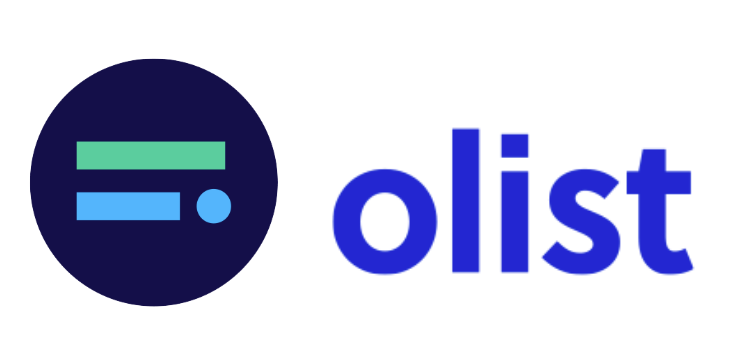

- Olist est implanté et n’opère qu’au Brésil.

- C’est une entreprise 100% numérique. En effet, les opérations commerciales sont entièrement gérées en ligne).

- Service e-commerce pour les vendeurs.

- Connecte les (petits) commerçants aux places de marché les plus importantes du Brésil (Amazon, Bahia, Walmart, ...).

- Offre des services de logistique et de gestion des stocks aux vendeurs.

- Ne vend rien directement aux consommateurs.




# Votre mission

Objectif :
Aider les chefs d'entreprise dans leur processus de prise de décision.


Le PDG d'Olist, vous a chargé de donner un sens à l'ensemble des données afin de formuler des recommandations sur la question suivante :

**Comment accroître la satisfaction des clients d’Olist ?**

# La data

Informations sur environ 100 000 commandes effectuées entre 2016 et 2018.
Des données réelles !
Les informations identifiables ont été anonymisées.
Documentation complète disponible dans le dictionnaire mis à disposition.

## Le déroulement pour chaque vendeur


Le vendeur rejoint Olist et met en ligne à disposition d’Olist ses catalogues de produits.
Olist affiche ces catalogues sur les plateformes commerciales existantes (Amazon, Bahia, Walmart, ...).
Le vendeur reçoit une notification dès qu'un produit est vendu.
Le vendeur transmet les articles commandés à des transporteurs logistiques tiers.

Attention : Plusieurs vendeurs peuvent être impliqués dans la commande d'un client !


## Le déroulement pour le client


Le client parcourt les produits sur  les plateformes commerciales (Amazon, Bahia, Walmart, ...).
Il achète les produits listés via Olist.store.
Il obtient une date prévue pour la livraison, en tenant compte de l’estimation de l'heure d'arrivée.
Le client reçoit la/les commande(s) et laisse un commentaire.

Remarque : entre 2016 et mi-2018, un avis pouvait être laissé dès l'envoi de la commande, ce qui signifie qu'un client pouvait potentiellement laisser un avis pour un produit qu'il n'avait pas encore reçu !





**Vous devrez faire une présentation dans un premier temps sous slides, qui contient au minimum le contexte, la problématique, ainsi que la conclusion qui contient des RECOMMANDATIONS faites au client, dans le but d'améliorer la satisfaction des clients d'Olist. Aussi, vous utiliserez un dashboard pour convaincre le client, pour que les recommandations soit logiques à ses yeux. Pour rappel, la recommandation est l'élément central d'une présentation réalisée par un data analyst. En effet, à vous d'être convaincant, pour que vos arguments soient entendus. Il est donc nécessaire de développer un minimum d'expertise métier sur le sujet, pour être à l'aise avec ses recommandations.** Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer vos choix sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.
Le juré examinateur, lors de la partie question, peut vous poser des questions sur le code qui est contenu dans votre google colab. Il est donc indispensable de mettre à disposition dans les pièces soumises pour le passage oral, votre travail exploratoire contenu dans un google colab.



## Livrables attendus
Le client souhaite une présentation avec des slides (sous format pdf) et un tableau de bord intéractif (Power BI, Tableau ou autre outil de BI).  

La présentation contiendra à minima ces éléments :
- Rappel du contexte et de la problématique
- Recommandations
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés
- NLP: Utilisation des reviews contenus dans `order_reviews_df`, en intégrant au moins un "wordcloud" dans votre tableau de bord.
- Votre tableau de bord contient des graphiques.
- Votre tableau de bord contient au moins une visualisation de données interactive.
- Votre tableau de bord contient au moins une carte représentant des informations géographiques.
- Votre tableau de bord contient au moins un tableau croisé.
- L'ensemble des graphiques et visuels doit être lisible par tous (prise en compte des personnes en situation de handicap visuel).
- Réponse à la question métier : Recommandations pour accroître la satisfaction des clients d'Olist.

# C'est parti ! Importer les données

Exécutes les cellules ci-dessous pour récupérer les tables de données.

In [ ]:
import pandas as pd
import zipfile
import io
import requests

# import orders_customers_dataset
orders_customers_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/orders_customers_dataset.csv").drop(columns = "Unnamed: 0")

# import geolocation_dataset
response = requests.get("https://github.com/WildCodeSchool/wilddata/raw/main/geolocation_dataset.zip")
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall()
geolocation_df = pd.read_csv("geolocation_dataset.csv").drop(columns = "Unnamed: 0")

# import order_items_dataset
order_items_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/order_items_dataset.csv").drop(columns = "Unnamed: 0")

# import order_payments_dataset
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/order_payments_dataset.csv").drop(columns = "Unnamed: 0")

# import order_reviews_dataset
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/order_reviews_dataset.csv").drop(columns = "Unnamed: 0")

# import orders_dataset
order_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/orders_dataset.csv").drop(columns = "Unnamed: 0")

# import products_dataset
products_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/products_dataset.csv").drop(columns = "Unnamed: 0")

# import sellers_dataset
sellers_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/sellers_dataset.csv").drop(columns = "Unnamed: 0")

Voici le schéma de la base de données:



---

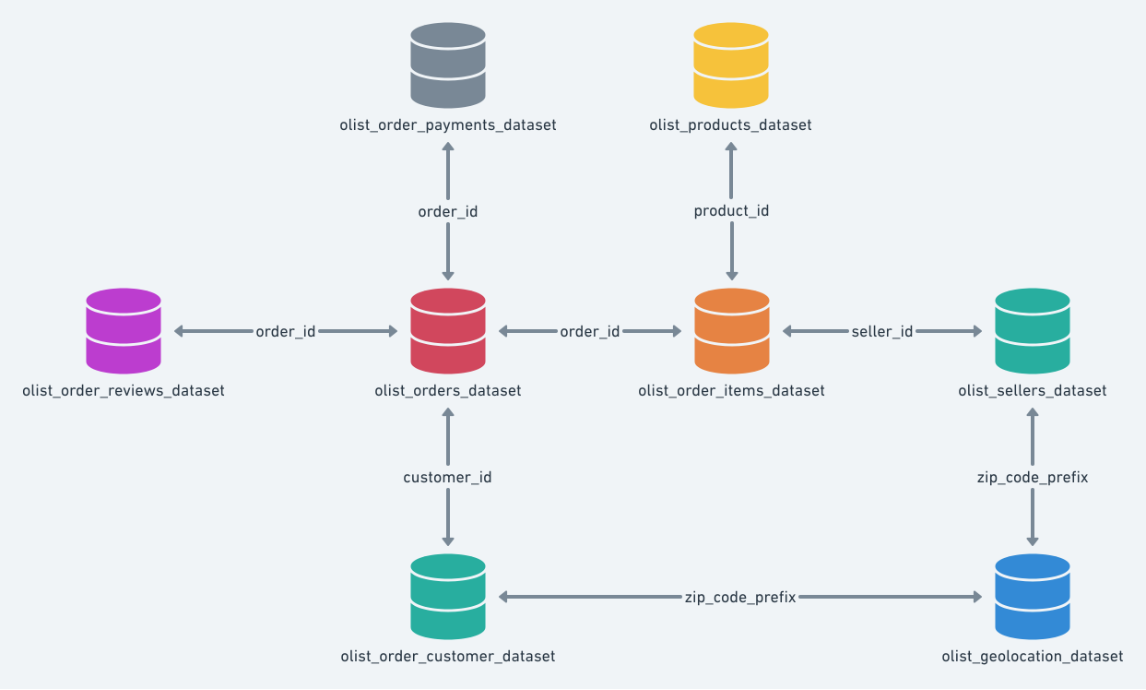

[Voici le dictionnaire qui permet d'avoir une explication détaillée](https://colab.research.google.com/drive/1c3mo2LuHMV3nPZigrS1O9mNaStNVH8jE?usp=sharing) sur chacune des colonnes de la base de données.

Votre travail commence ici: